In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
## Works well in python 2.x.

# Creating a simple Gaussian HMM

In [16]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
model.covars_
X, Z = model.sample(100)
#The HMM is a generative probabilistic model, in which a 
#sequence of observable X variables is generated by a sequence of internal hidden states Z. 

array([[[ 1.,  0.],
        [ 0.,  1.]],

       [[ 1.,  0.],
        [ 0.,  1.]],

       [[ 1.,  0.],
        [ 0.,  1.]]])

In [17]:
X[0:5,:]
Z

array([[ 1.11188012,  0.31890218],
       [-1.57921282,  0.76743473],
       [ 0.58087813, -0.52516981],
       [-0.24196227, -1.91328024],
       [-0.81644508, -1.523876  ]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

# Learning a Gaussian HMM

In [18]:
X1 = [[0.5], [1.0], [-1.0], [0.42], [0.24]]
X2 = [[2.4], [4.2], [0.5], [-0.24]]
#To pass both sequences to fit or predict, first concatenate them 
#into a single array and then compute an array of sequence lengths:
X = np.concatenate([X1, X2])
X
lengths = [len(X1), len(X2)]
model2=hmm.GaussianHMM(n_components=3, n_iter=100)
model2.fit(X, lengths)
Z2 = model2.predict(X)

array([[ 0.5 ],
       [ 1.  ],
       [-1.  ],
       [ 0.42],
       [ 0.24],
       [ 2.4 ],
       [ 4.2 ],
       [ 0.5 ],
       [-0.24]])

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [19]:
Z2

array([2, 0, 0, 2, 0, 0, 0, 2, 0])

In [20]:
model2.means_
model2.covars_
model2.startprob_
model2.transmat_

array([[ 0.007316  ],
       [ 3.29999958],
       [ 0.47447678]])

array([[[ 0.52520581]],

       [[ 0.81500124]],

       [[ 0.00483729]]])

array([  9.88223895e-12,   5.00000000e-01,   5.00000000e-01])

array([[  5.51174682e-01,   1.07871770e-41,   4.48825318e-01],
       [  3.14610797e-12,   5.00000098e-01,   4.99999902e-01],
       [  9.99999996e-01,   2.32128604e-37,   3.68651748e-09]])

In [21]:
from sklearn.externals import joblib
joblib.dump(model2, "filename.pkl")
joblib.load("filename.pkl")  

['filename.pkl']

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

# Sampling from HMM

This script shows how to sample points from a Hiden Markov Model (HMM): we use a 4-components with specified mean and covariance.

The plot show the sequence of observations generated with the transitions between them. We can see that, as specified by our transition matrix, there are no transition between component 1 and 3.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

In [23]:
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars

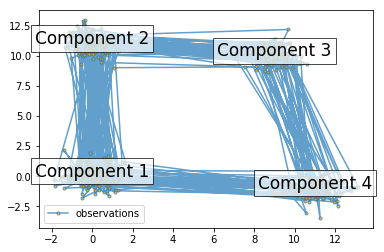

In [25]:
# Generate samples
X, Z = model.sample(500)

# Plot the sampled data
_=plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    _=plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
_=plt.legend(loc='best')
_=plt.show()
